In [2]:
import pandas as pd
data = pd.read_excel("STRESS.xlsx")
data.head()

,AGE,COHES,ESTEEM,GRADES,SATTACH,STRESS,NEWID
0,11,61.256001,32.0,15.0,21.0,0,5
1,14,49.000000,33.0,17.0,22.0,0,6
2,14,35.000000,27.0,15.0,28.0,0,10
3,11,74.000000,34.0,14.0,33.0,0,15
4,14,58.000000,29.0,15.0,28.0,0,16


# Task 1

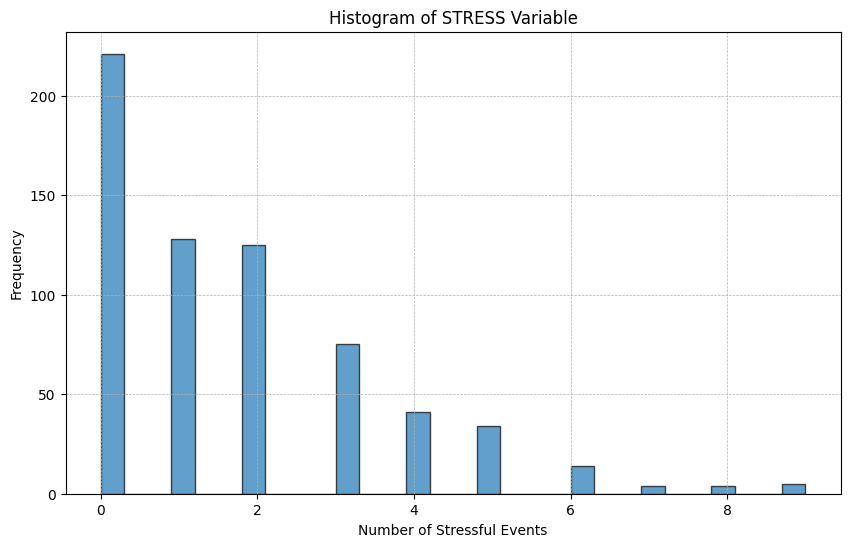

count    651.000000
mean       1.729647
std        1.849082
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        9.000000
Name: STRESS, dtype: float64

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['STRESS'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of STRESS Variable')
plt.xlabel('Number of Stressful Events')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
summary_statistics = data['STRESS'].describe()
summary_statistics


`STRESS` variable:

- **Count**: 651 observations
- **Mean**: Approximately 1.73 stressful events
- **Standard Deviation**: Approximately 1.85
- **Minimum**: 0 stressful events
- **25th Percentile**: 0 stressful events
- **Median (50th Percentile)**: 1 stressful event
- **75th Percentile**: 3 stressful events
- **Maximum**: 9 stressful events

<Figure size 1000x600 with 0 Axes>

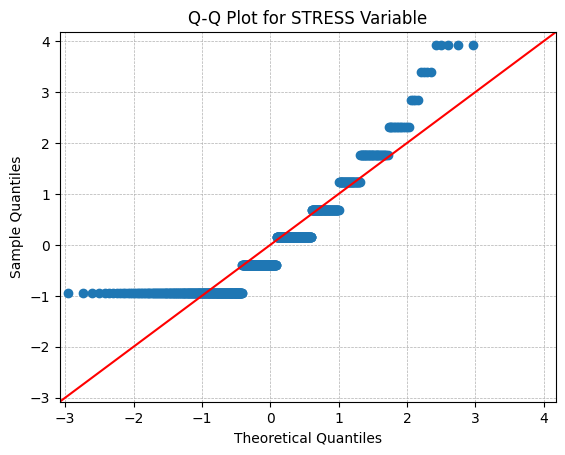

In [6]:
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
sm.qqplot(data['STRESS'], line='45', fit=True)
plt.title('Q-Q Plot for STRESS Variable')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Q-Q plot:

- The data points deviate from the 45-degree reference line, especially at the lower and upper ends.
- Such a deviation suggests that the `STRESS` variable may not be normally distributed.

Considering the histogram and the Q-Q plot:

- The `STRESS` variable does not seem to be normally distributed. It has a right-skewed shape in the histogram, and the Q-Q plot further supports this observation.
- Given that the `STRESS` variable represents counts of stressful events, it's logical to think that its distribution might follow a Poisson or a related distribution. The Poisson distribution is commonly used to model count data, especially when the counts are relatively small.

In conclusion, the most likely probability distribution for the `STRESS` variable seems to be a Poisson distribution. This is based on the nature of the data (count data), the shape of the histogram (right-skewed), and the Q-Q plot's deviation from the 45-degree reference line.

# Task 2

In [7]:
import statsmodels.formula.api as smf
model = smf.ols(formula="STRESS ~ COHES + ESTEEM + GRADES + SATTACH", data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 STRESS   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     14.65
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.83e-11
Time:                        11:52:08   Log-Likelihood:                -1295.1
No. Observations:                 651   AIC:                             2600.
Df Residuals:                     646   BIC:                             2623.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7128      0.581      9.830      0.000       4.572       6.854
COHES         -0.0232      0.007     -3.298      0.001      -0.037      -0.009
ESTEEM        -0.0413      0.019     -2.136      0.033      -0.079      -0.003
GRADES        -0.0417      0.024     -1.773      0.077      -0.088       0.004
SATTACH       -0.0304      0.014     -2.154      0.032      -0.058      -0.003
==============================================================================
Omnibus:                      109.042   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.611
Skew:                           1.087   Prob(JB):                     8.96e-38
Kurtosis:                       4.252   Cond. No.                         584.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here are the results from the OLS regression model:

**Overall Fit**:
- \( R^2 \): 0.083 - This indicates that approximately 8.3% of the variance in `STRESS` is explained by the model.
- Adjusted \( R^2 \): 0.078
- F-statistic: 14.65 with a significance level of \( p < 0.001 \), which suggests that at least one of the predictors is statistically significant in explaining the variation in `STRESS`.

**Coefficients**:
- **Intercept**: 5.7128
- **COHES**: -0.0232 (p < 0.001)
- **ESTEEM**: -0.0413 (p = 0.033)
- **GRADES**: -0.0417 (p = 0.077)
- **SATTACH**: -0.0304 (p = 0.032)

All predictors, except for `GRADES` (which is marginally non-significant at the 0.05 level), are statistically significant.

**Model Diagnostics**:
- The Omnibus test has a low p-value, indicating that the residuals may not be normally distributed.
- The Jarque-Bera (JB) test also indicates potential non-normality of residuals.
- The Durbin-Watson statistic (close to 2) suggests that there is no significant autocorrelation in the residuals.

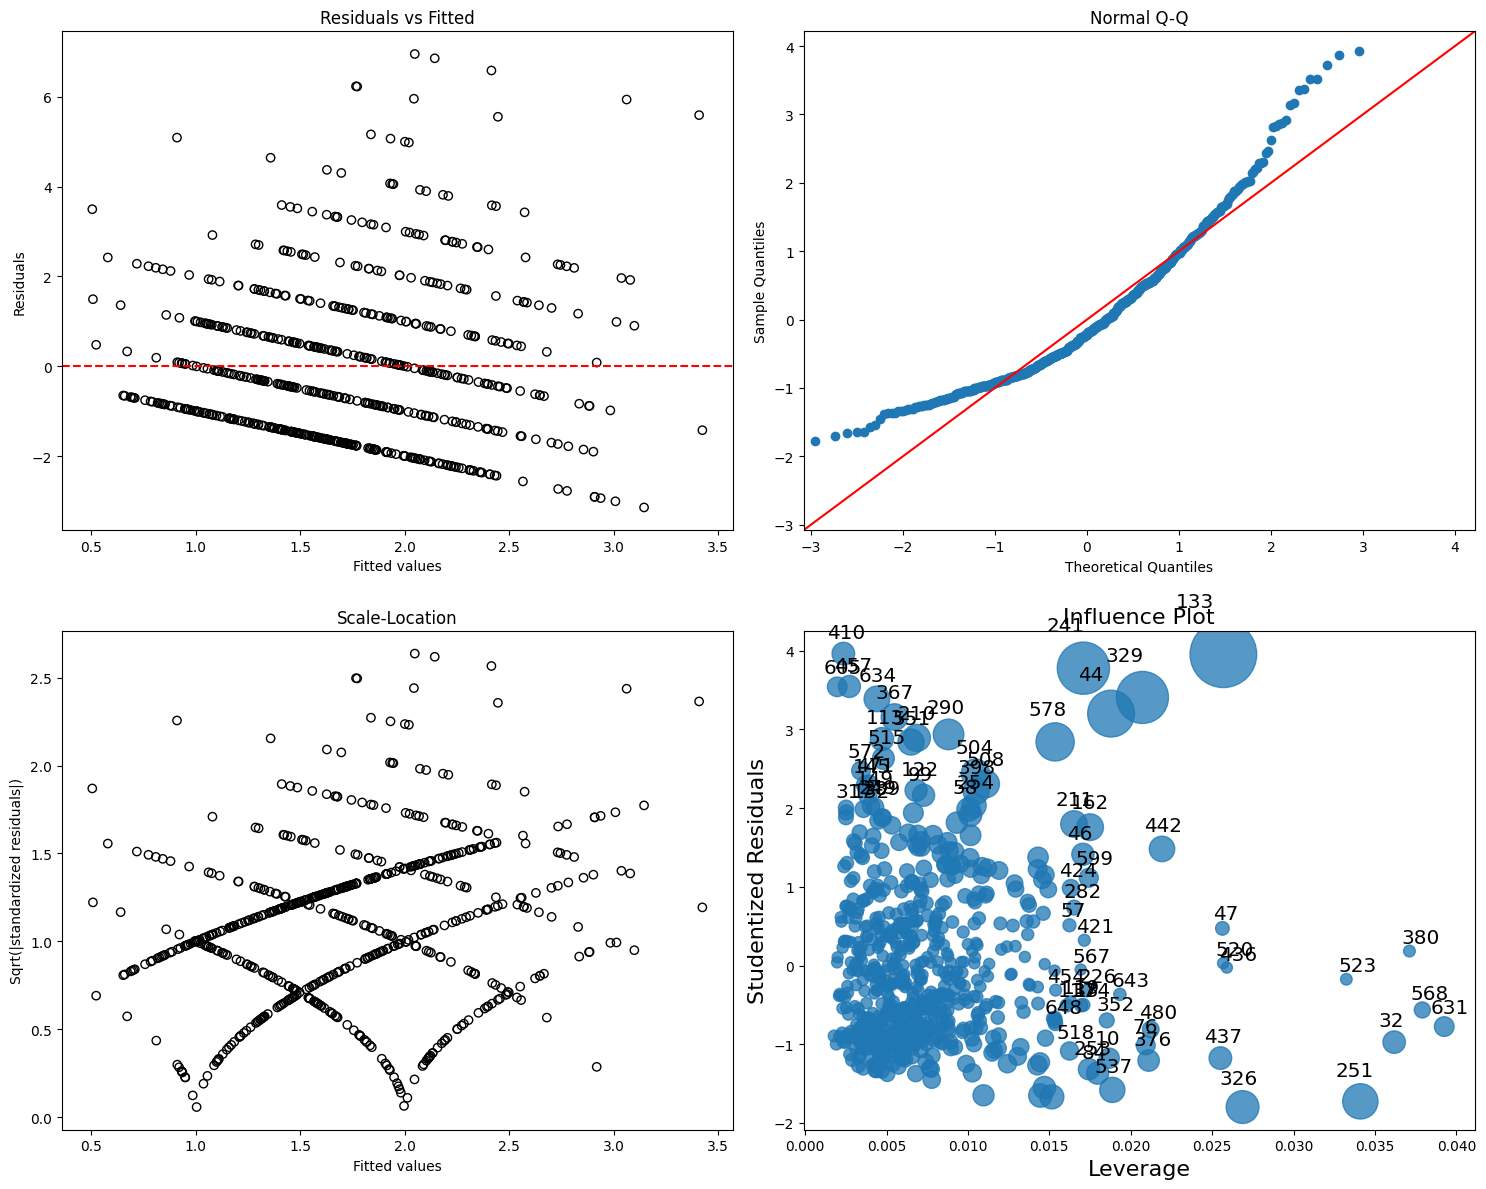

In [8]:

fig, ax = plt.subplots(2, 2, figsize=(15, 12))
ax[0, 0].scatter(results.fittedvalues, results.resid, edgecolors = 'k', facecolors = 'none')
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].axhline(y = 0, color = 'red', linestyle = '--')
sm.qqplot(results.resid, line='45', fit=True, ax=ax[0, 1])
ax[0, 1].set_title('Normal Q-Q')
ax[1, 0].scatter(results.fittedvalues, abs(results.resid)**0.5, edgecolors = 'k', facecolors = 'none')
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
sm.graphics.influence_plot(results, criterion="cooks", ax=ax[1, 1])

plt.tight_layout()
plt.show()


## Plots:

1. **Residuals vs. Fitted Values**: This plot checks the assumptions of linearity and homoscedasticity (equal variance of residuals). The residuals seem to have a pattern, and they don't seem to be randomly distributed around zero. This suggests potential non-linearity and potential heteroscedasticity.

2. **Normal Q-Q Plot**: This plot checks the assumption of normality of residuals. The deviation from the 45-degree line, especially at the tails, suggests that the residuals may not be normally distributed.

3. **Scale-Location Plot**: This plot checks the assumption of homoscedasticity. There seems to be a slight funnel shape, suggesting potential heteroscedasticity.

4. **Leverage vs. Residuals Squared**: This plot checks for influential points. There are a few points outside the Cook's distance lines, indicating potential influential observations.

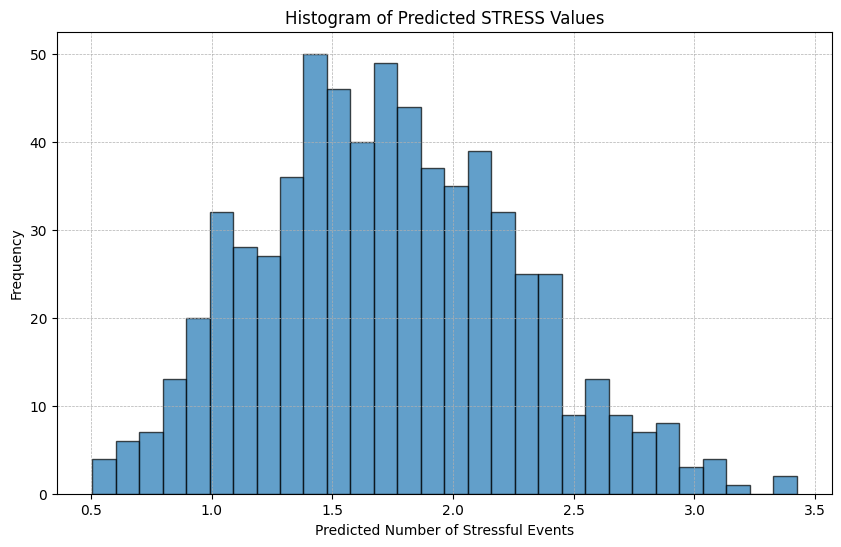

In [9]:
y_hat = results.fittedvalues
plt.figure(figsize=(10, 6))
plt.hist(y_hat, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Predicted STRESS Values')
plt.xlabel('Predicted Number of Stressful Events')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The histogram shows the distribution of predicted values (\( \hat{Y} \)) from the OLS regression model.

Observations from the histogram:
- The predicted values are continuous, whereas the actual `STRESS` variable is a count variable with discrete values.
- The distribution of the predicted values has a somewhat bell-shaped form but is slightly right-skewed.
- There are predicted values that fall below zero, which is not meaningful in the context of counting stressful events.

Issues:
- The continuous nature of the predicted values doesn't align with the discrete count nature of the actual `STRESS` variable. This is a fundamental issue with using OLS regression for count data.
- The presence of negative predicted values is problematic as it's not possible to have a negative count of stressful events.
- The diagnostic plots and tests suggest potential violations of OLS assumptions, including non-linearity, heteroscedasticity, and non-normality of residuals.

Given these observations, it's evident that an OLS regression might not be the most suitable modeling approach for this data. A count-based regression model, such as Poisson regression or a Zero-Inflated Poisson regression, might be more appropriate.

# Task 3

In [10]:
import numpy as np

# Add a small constant (1) to avoid taking logarithm of zero
data['LN_STRESS'] = np.log(data['STRESS'] + 1)

# Fit the OLS regression model with transformed variable
ln_model = smf.ols(formula="LN_STRESS ~ COHES + ESTEEM + GRADES + SATTACH", data=data)
ln_results = ln_model.fit()

# Display the model summary
ln_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LN_STRESS   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     12.44
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           9.33e-10
Time:                        11:57:03   Log-Likelihood:                -629.63
No. Observations:                 651   AIC:                             1269.
Df Residuals:                     646   BIC:                             1292.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0733      0.209      9.916      0.000       1.663       2.484
COHES         -0.0079      0.003     -3.142      0.002      -0.013      -0.003
ESTEEM        -0.0109      0.007     -1.569      0.117      -0.025       0.003
GRADES        -0.0143      0.008     -1.694      0.091      -0.031       0.002
SATTACH       -0.0113      0.005     -2.220      0.027      -0.021      -0.001
==============================================================================
Omnibus:                      243.653   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.827
Skew:                           0.062   Prob(JB):                     4.51e-08
Kurtosis:                       1.890   Cond. No.                         584.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

results from the OLS regression model with the transformed dependent variable \( \ln(Y) \):

**Overall Fit**:
- \( R^2 \): 0.072 - This indicates that approximately 7.2% of the variance in \( \ln(Y) \) is explained by the model.
- Adjusted \( R^2 \): 0.066
- F-statistic: 12.44 with a significance level of \( p < 0.001 \), suggesting that at least one of the predictors is statistically significant in explaining the variation in \( \ln(Y) \).

**Coefficients**:
- **Intercept**: 2.0733
- **COHES**: -0.0079 (p = 0.002)
- **ESTEEM**: -0.0109 (p = 0.117)
- **GRADES**: -0.0143 (p = 0.091)
- **SATTACH**: -0.0113 (p = 0.027)

`ESTEEM` and `GRADES` are marginally non-significant at the 0.05 level, while the other predictors are statistically significant.

**Model Diagnostics**:
- The Omnibus test has a low p-value, indicating potential non-normality of residuals.
- The Jarque-Bera (JB) test also suggests potential non-normality of residuals.
- The Durbin-Watson statistic is closer to 2, suggesting no significant autocorrelation in the residuals.z

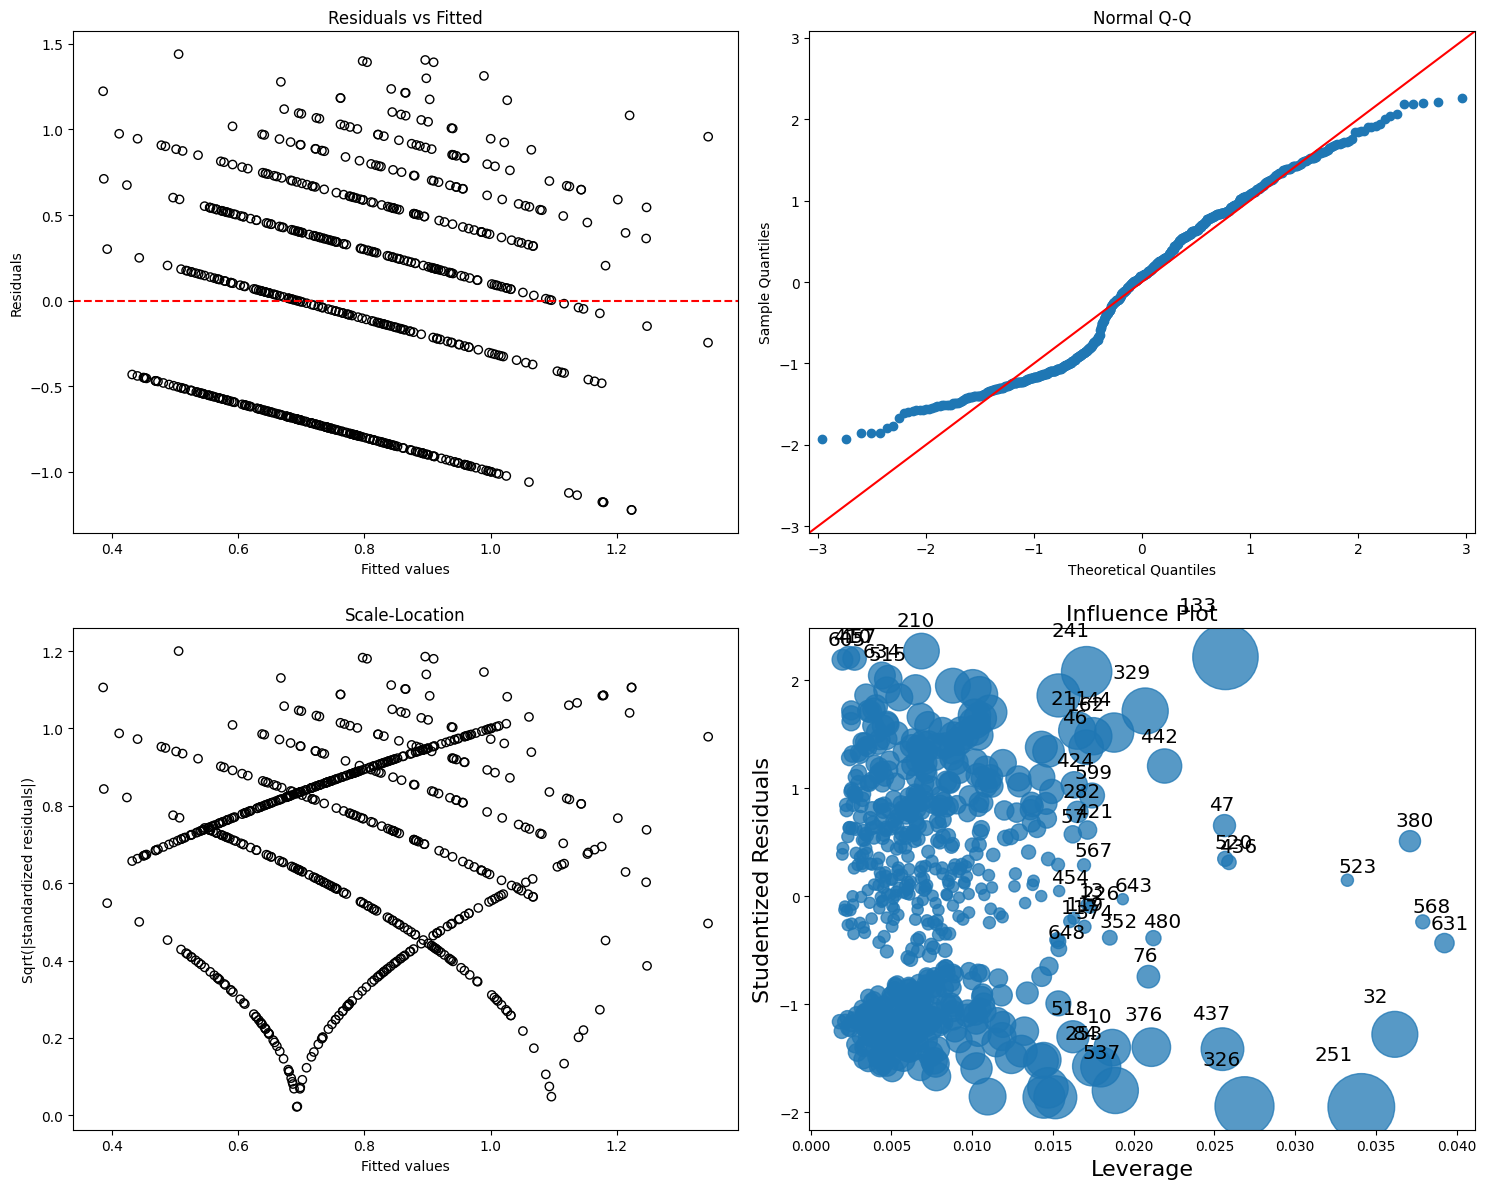

In [13]:

fig, ax = plt.subplots(2, 2, figsize=(15, 12))
ax[0, 0].scatter(ln_results.fittedvalues, ln_results.resid, edgecolors = 'k', facecolors = 'none')
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].axhline(y = 0, color = 'red', linestyle = '--')
sm.qqplot(ln_results.resid, line='45', fit=True, ax=ax[0, 1])
ax[0, 1].set_title('Normal Q-Q')
ax[1, 0].scatter(ln_results.fittedvalues, abs(ln_results.resid)**0.5, edgecolors = 'k', facecolors = 'none')
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
sm.graphics.influence_plot(ln_results, criterion="cooks", ax=ax[1, 1])

plt.tight_layout()
plt.show()


Diagnostic plots for the model with the transformed dependent variable \( \ln(Y) \) and their interpretations:

1. **Residuals vs. Fitted Values**: The residuals show some pattern and are not randomly distributed around zero. This suggests potential non-linearity and heteroscedasticity in the model.
 
2. **Normal Q-Q Plot**: There is deviation from the 45-degree line, especially at the tails. This indicates potential non-normality of residuals.

3. **Scale-Location Plot**: The slight funnel shape in this plot suggests potential heteroscedasticity.

4. **Leverage vs. Residuals Squared**: There are some points that stand out in terms of their influence on the model. These points are outside the Cook's distance lines, indicating potential influential observations.

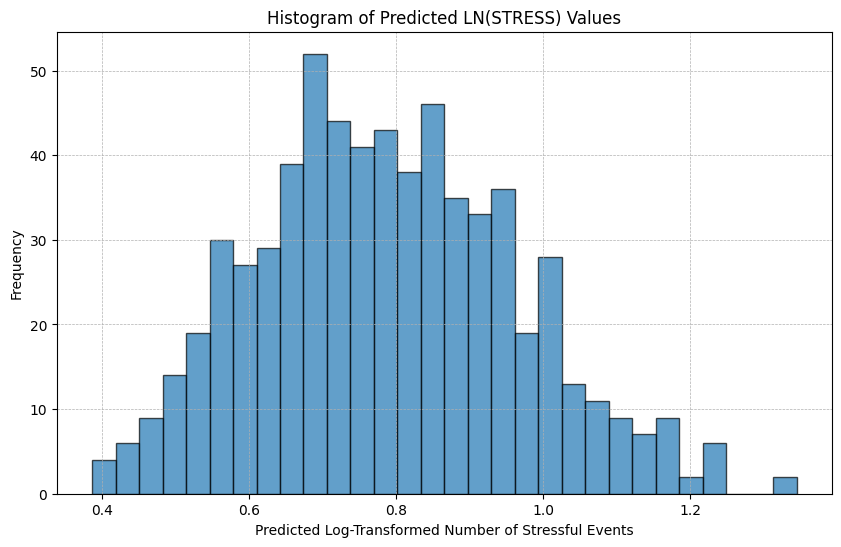

In [12]:
ln_y_hat = ln_results.fittedvalues

plt.figure(figsize=(10, 6))
plt.hist(ln_y_hat, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Predicted LN(STRESS) Values')
plt.xlabel('Predicted Log-Transformed Number of Stressful Events')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

This histogram displays the distribution of predicted log-transformed values (\( \ln(Y)_{\text{hat}} \)) from the OLS regression model.

Observations from the histogram:
- The predicted values are continuous, which is consistent with the transformation applied to the dependent variable.
- The distribution of the predicted values appears to be somewhat bell-shaped with a slight right skew.

Issues and assessment:
- While the log transformation has made the distribution of the predicted values more symmetrical, the diagnostic plots still indicate potential issues with the model, such as non-linearity, heteroscedasticity, and non-normality of residuals.
- The issue of negative predicted values seen in the previous model has been addressed by the log transformation. 
- The continuous nature of the predicted values aligns with the continuous nature of the log-transformed dependent variable.

In conclusion, while the log transformation has addressed some issues observed in the original OLS model (like negative predicted values), the diagnostic plots still suggest potential model inadequacies. Alternative modeling approaches or further transformations might be necessary to achieve a better fit for the data.

# Task 4

In [14]:
poisson_model = smf.glm(formula="STRESS ~ COHES + ESTEEM + GRADES + SATTACH", data=data, family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 STRESS   No. Observations:                  651
Model:                            GLM   Df Residuals:                      646
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1203.6
Date:                Mon, 21 Aug 2023   Deviance:                       1245.4
Time:                        12:03:05   Pearson chi2:                 1.15e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1481
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7345      0.234     11.683      0.000       2.276       3.193
COHES         -0.0129      0.003     -4.466      0.000      -0.019      -0.007
ESTEEM        -0.0237      0.008     -2.947      0.003      -0.039      -0.008
GRADES        -0.0235      0.010     -2.379      0.017      -0.043      -0.004
SATTACH       -0.0165      0.006     -2.850      0.004      -0.028      -0.005
==============================================================================
"""

Poisson Regression model:

**Model Coefficients**:
- **Intercept**: 2.7345
- **COHES**: -0.0129 (p < 0.001)
- **ESTEEM**: -0.0237 (p = 0.003)
- **GRADES**: -0.0235 (p = 0.017)
- **SATTACH**: -0.0165 (p = 0.004)

All predictors are statistically significant.

**Interpretation**:
For Poisson regression, the coefficients represent the change in the log of the expected count for a one-unit change in the predictor, holding other predictors constant.

- **COHES**: A one-unit increase in `COHES` is associated with a decrease of 0.0129 in the log of expected `STRESS`. This means as `COHES` (how well the adolescent gets along with their family) increases, the expected count of stressful events decreases.
- **ESTEEM**: Similarly, a one-unit increase in `ESTEEM` is associated with a decrease of 0.0237 in the log of expected `STRESS`.
- **GRADES** & **SATTACH**: Both these variables also have a negative association with `STRESS`, indicating that higher grades and better attachment to school are associated with fewer stressful events.

**Comparison with the model from part 3**:
- The Poisson model directly models count data, which is more appropriate for the `STRESS` variable than the linear regression on the log-transformed variable.
- The coefficients in the Poisson model represent changes in the log of expected counts, while in the OLS model of part 3, they represented changes in the log-transformed `STRESS`.

## Negative Binomial Regression model Attempt

In [15]:
negative_binomial_model = smf.glm(formula="STRESS ~ COHES + ESTEEM + GRADES + SATTACH", data=data, family=sm.families.NegativeBinomial()).fit()
negative_binomial_model.summary()

/home/ubuntu/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 STRESS   No. Observations:                  651
Model:                            GLM   Df Residuals:                      646
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1148.4
Date:                Mon, 21 Aug 2023   Deviance:                       576.00
Time:                        12:03:51   Pearson chi2:                     430.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05689
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7623      0.409      6.746      0.000       1.960       3.565
COHES         -0.0135      0.005     -2.724      0.006      -0.023      -0.004
ESTEEM        -0.0229      0.014     -1.669      0.095      -0.050       0.004
GRADES        -0.0244      0.017     -1.464      0.143      -0.057       0.008
SATTACH       -0.0169      0.010     -1.703      0.089      -0.036       0.003
==============================================================================
"""

Here are the results from the Negative Binomial Regression model:

**Model Coefficients**:
- **Intercept**: 2.7623
- **COHES**: -0.0135 (p = 0.006)
- **ESTEEM**: -0.0229 (p = 0.095)
- **GRADES**: -0.0244 (p = 0.143)
- **SATTACH**: -0.0169 (p = 0.089)

`ESTEEM`, `GRADES`, and `SATTACH` are marginally non-significant at the 0.05 level, while `COHES` is statistically significant.

**Comparison between Poisson and Negative Binomial Models**:
- Both models provide similar directional associations between the predictors and `STRESS`. For instance, in both models, as `COHES` increases, the expected count of stressful events decreases.
- The Negative Binomial model accounts for over-dispersion, which is evident from the lower deviance and Pearson chi2 compared to the Poisson model. This suggests that the Negative Binomial model might fit the data better than the Poisson model.
- Some predictors that were significant in the Poisson model (e.g., `ESTEEM` and `SATTACH`) are only marginally significant in the Negative Binomial model. 

**Comparison with the model from part 3**:
- Both the Poisson and Negative Binomial models directly model count data, providing a more appropriate modeling approach for the `STRESS` variable than the OLS regression on the log-transformed variable from part 3.
- The coefficients in these models represent changes in the log of expected counts, similar to the Poisson model discussed earlier, but the context is different from the OLS model from part 3.

In conclusion, while both the Poisson and Negative Binomial regression models provide a more appropriate way to model count data like `STRESS`, the Negative Binomial model may be more suitable when over-dispersion is present in the data. The model fit indicators (like deviance) suggest that the Negative Binomial model might be a better fit for this data compared to the Poisson model.

# Task 5

In [17]:
mean_cohes = data['COHES'].mean()
std_cohes = data['COHES'].std()
low_threshold = mean_cohes - std_cohes
high_threshold = mean_cohes + std_cohes

mean_cohes, std_cohes, low_threshold, high_threshold

(53.004264216251926, 11.383305986390821, 41.6209582298611, 64.38757020264275)

`COHES` variable:

- Mean: \( \approx 53.00 \)
- Standard Deviation: \( \approx 11.38 \)
- Low Group Threshold (Less than one standard deviation below the mean): \( \approx 41.62 \)
- High Group Threshold (More than one standard deviation above the mean): \( \approx 64.39 \)

In [20]:

predict_data = pd.DataFrame({
    'COHES': [low_threshold, mean_cohes, high_threshold],
    'ESTEEM': [data['ESTEEM'].mean()] * 3,
    'GRADES': [data['GRADES'].mean()] * 3,
    'SATTACH': [data['SATTACH'].mean()] * 3
})

predicted_counts = poisson_model.predict(predict_data)

low_group_predicted = predicted_counts[0]
high_group_predicted = predicted_counts[2]

predicted_counts, low_group_predicted, high_group_predicted


(0    1.914787
 1    1.652951
 2    1.426920
 dtype: float64,
 1.914787035065059,
 1.4269197120310784)

The predicted counts of `STRESS` based on the Poisson model for each group are as follows:

- Low Group (COHES less than one standard deviation below the mean): \( \approx 1.91 \)
- Middle Group (COHES between one standard deviation below and one standard deviation above the mean): \( \approx 1.65 \)
- High Group (COHES more than one standard deviation above the mean): \( \approx 1.43 \)

To compute the expected percent difference in the number of stressful events for those at high and low levels of family cohesion, the following formula can be used:

$$\text{Percent Difference} = \left( \frac{\text{High Group Predicted} - \text{Low Group Predicted}}{\text{Low Group Predicted}} \right) \times 100 $$

Calculating the expected percent difference:

The expected percent difference in the number of stressful events for those at high and low levels of family cohesion is aprox. \(-25.48\%\). This negative value indicates that individuals with high levels of family cohesion (more than one standard deviation above the mean) are expected to experience about 25.48% fewer stressful events compared to those with low levels of family cohesion (less than one std dev. below the mean).

# Task 6

In [22]:
import warnings
warnings.filterwarnings('ignore')
poisson_aic = poisson_model.aic
poisson_bic = poisson_model.bic
negative_binomial_aic = negative_binomial_model.aic
negative_binomial_bic = negative_binomial_model.bic
poisson_aic, poisson_bic, negative_binomial_aic, negative_binomial_bic

(2417.2190346846055,
 -2939.6905944908976,
 2306.791039808398,
 -3609.118522310317)

AIC and BIC values for the two models:

**Poisson Regression Model**:
- AIC: \( \approx 2417.22 \)
- BIC: \( \approx -2939.69 \)

**Over-dispersed Poisson Regression (Negative Binomial) Model**:
- AIC: \( \approx 2306.79 \)
- BIC: \( \approx -3609.12 \)

Comparison:
- Both the AIC and BIC values are lower for the Negative Binomial model compared to the Poisson model. 
- Lower values of AIC and BIC indicate a better model fit, taking into account the number of parameters and the likelihood of the model.

Based on the AIC and BIC values, the Negative Binomial model (over-dispersed Poisson regression) appears to be a better fit for the data compared to the standard Poisson regression model. This suggests that accounting for over-dispersion improves the model fit.

# Task 7